In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import math
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, r2_score, roc_auc_score, roc_curve, auc
from IPython.display import display
import warnings 

pd.options.display.max_columns = None
warnings.filterwarnings('ignore')

# Import custom py files/functions
from python_files import *
from python_files.confusion_matrix_func import *
from python_files.display_predictor_func import *
from python_files.generate_coef_dataframe_func import *


# logistic_regression

# Predicting instances of majority casual riders usng logistic regressions

- Majority casual riders is 'rare event' constitutes ~ 2% of data records
- Oversampled data with SMOTE package to make-up for imbalance
- 80% train, 20% test
- Treat day of week, time of day (hour) as a categorical

# Target Variable

- 'higher_casual' - column of zeros and ones, one indicates higher percentage of casual (non-subscription) riders than registered (subscription) riders for a given hour.  

# Predictor variables

In [2]:
display_predictors()

Index(['holiday', 'weekday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_2', 'season_3', 'season_4', 'weathersit_1', 'weathersit_2',
       'weathersit_3', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5',
       'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12', 'hr_13',
       'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21',
       'hr_22', 'hr_23'],
      dtype='object')

# Generate model and ROC Curve
The model has a high AUC ~ .83 which is a good sign.  

AUC for balanced: 0.8304119336728033


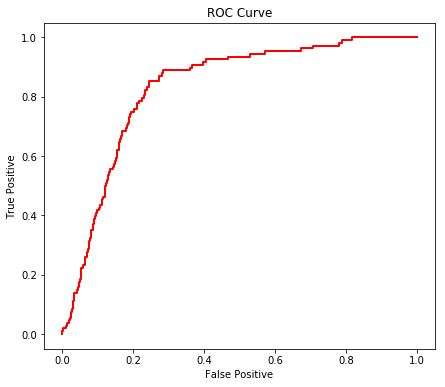

In [3]:
%run -i python_files/log_reg_plot_func.py

# Confusion Matrix
However when we scrutinze the confusion matrix we realize that the model performance is all that it seems to be.  Though our model is correct ~ 85% of the time, this performance is biased towards accurate predictions of 'higher_casual' = 0 rather than 'higher_casual'=1.

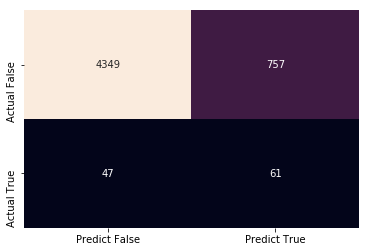

In [4]:
generate_conf_matrix(model_log, X_test, y_test)

However ana

# Top predictors for more non-registered riders than registered riders

It seems odd that the primary predictors for higher proportion of non-registered rider bike rentals occuring between 1 and 4 in the morning, this may be simply due to randomness.  However there may be some intuitive sense behind this.  1-4 AM is when transportation options are most limited, and the the data is from 2011-2012, before ride-sharing apps were popular.  

Holidays also make intuitive sense, many DC residents who are likely to have memberships leave town or stay home, while tourists who are probably not going to be registered come to the city.  

In [5]:
generate_coef_df(model_log, X_train)

,predictor,log_coefs
20,hr_3,2.066365
19,hr_2,1.967425
21,hr_4,1.908866
18,hr_1,0.750830
0,holiday,0.729956
